## Cargamos el Dataset de kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdwaquarazam/agricultural-crops-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/agricultural-crops-image-classification


## Visualización y análisis del Dataset

Visualizamos algunas imagenes del dataset

/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/tomato/image (16).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/chilli/image23.jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/clove/image23.jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/pineapple/image (5).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/vigna-radiati(Mung)/image (4).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Olive-tree/image (4).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/coconut/image (4).jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/papaya/image (5).jpg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Tobacco-plant/image9.jpeg
/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/jute/image (4).jpeg
/kaggle/input/agricultural-crops-

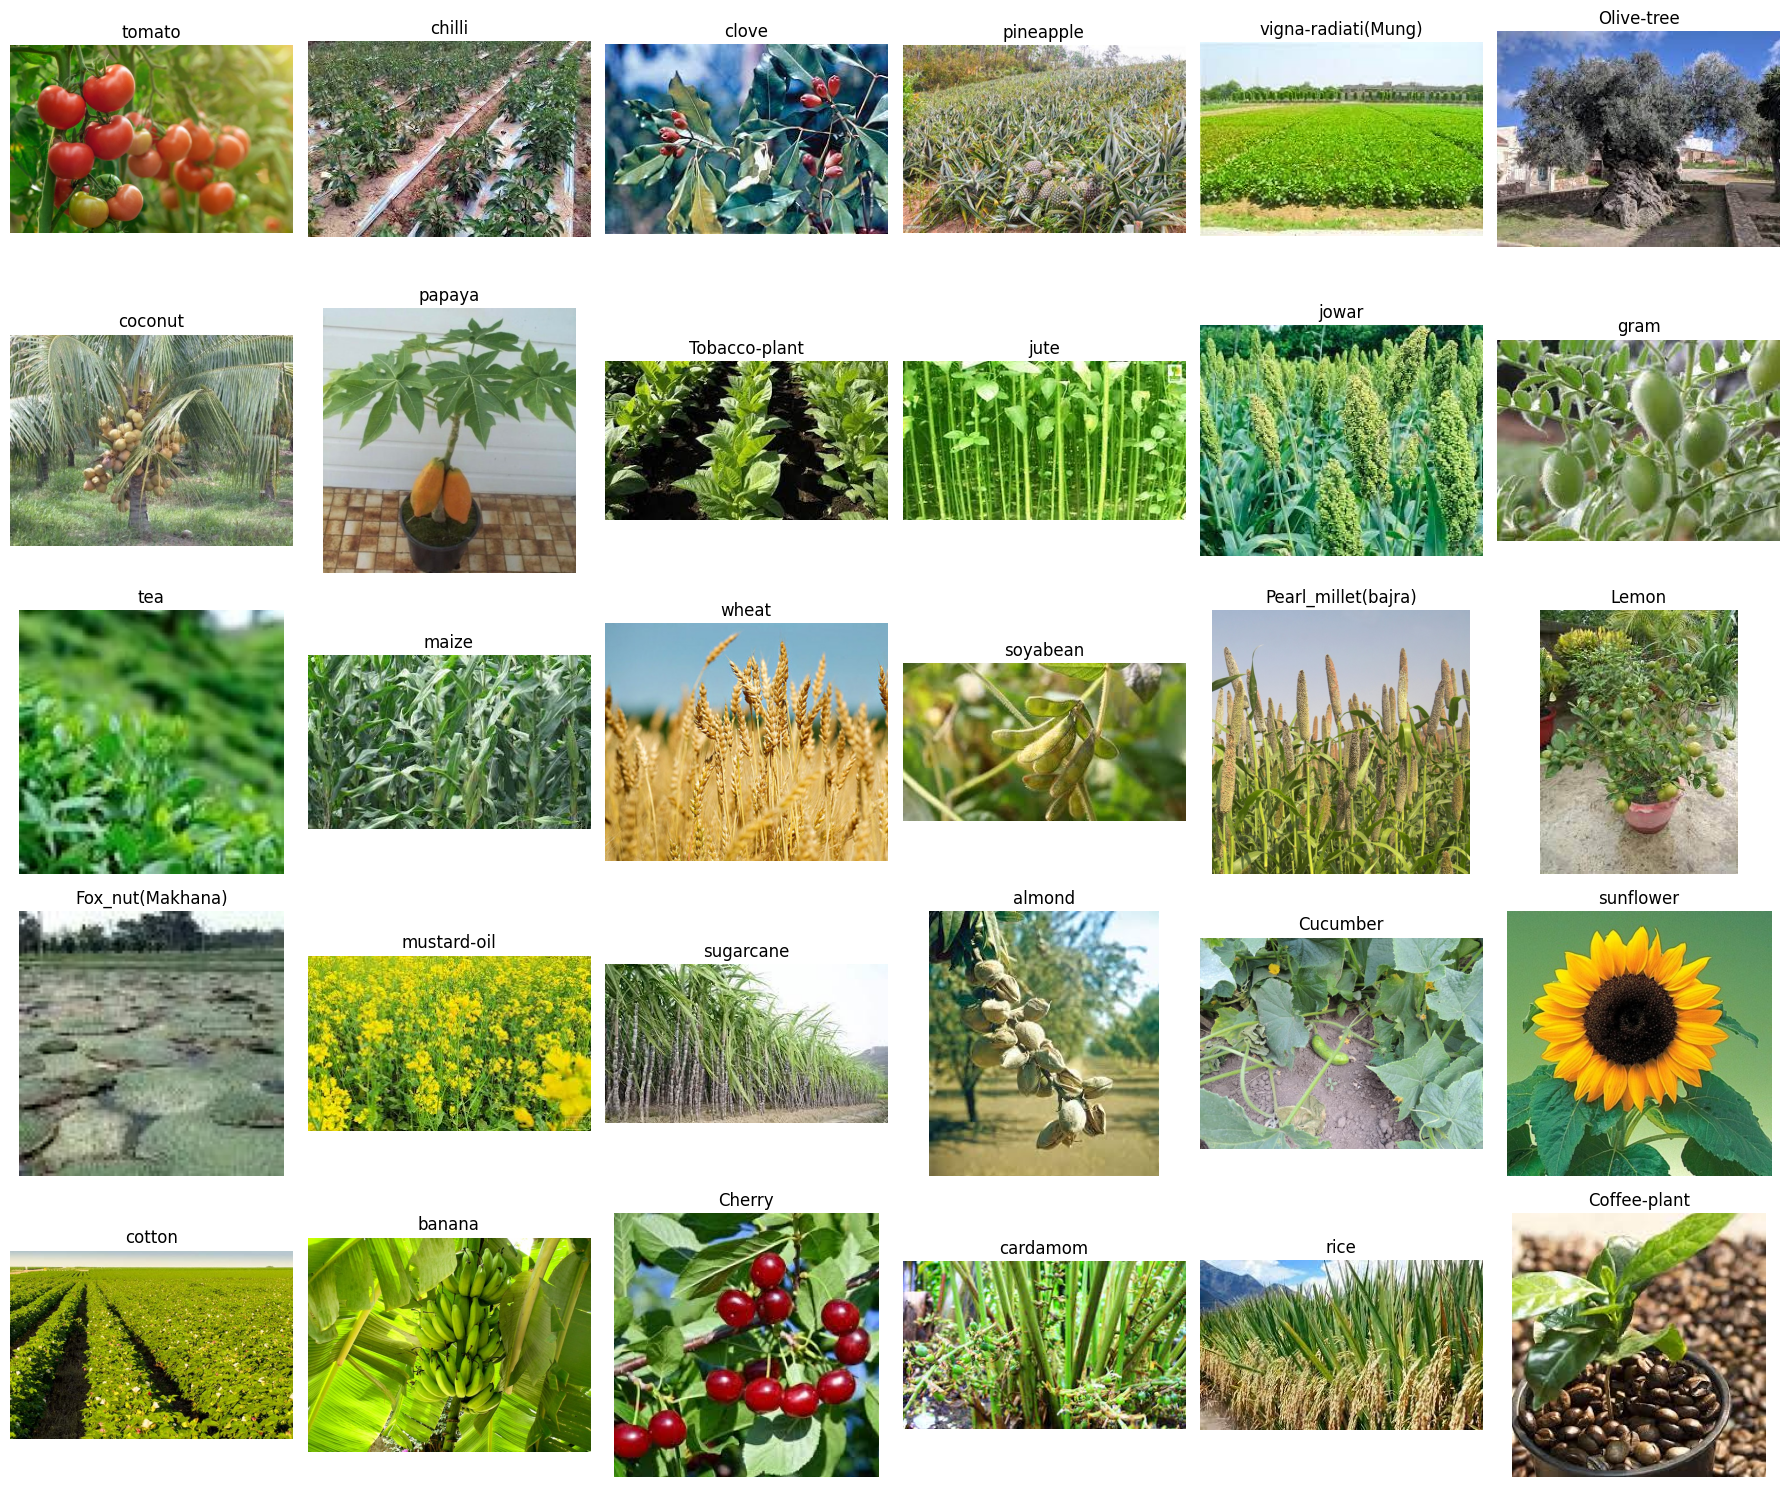

In [2]:
import matplotlib.pyplot as plt
import os
import cv2
import math

# SEED
seed = 49114865

# Parámetros
data_dir = path + "/Agricultural-crops"
classes = os.listdir(data_dir)
num_classes = len(classes)

# Calculamos un número adecuado de filas y columnas
cols = math.ceil(math.sqrt(num_classes))  # columnas
rows = math.ceil(num_classes / cols)      # filas

# Ajustamos el tamaño de la figura en base al número de filas y columnas
plt.figure(figsize=(cols * 3, rows * 3))

for i, c in enumerate(classes):
    img_path = os.path.join(data_dir, c, os.listdir(os.path.join(data_dir, c))[0])
    print(img_path)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(c)
    plt.axis('off')

plt.tight_layout()
plt.show()


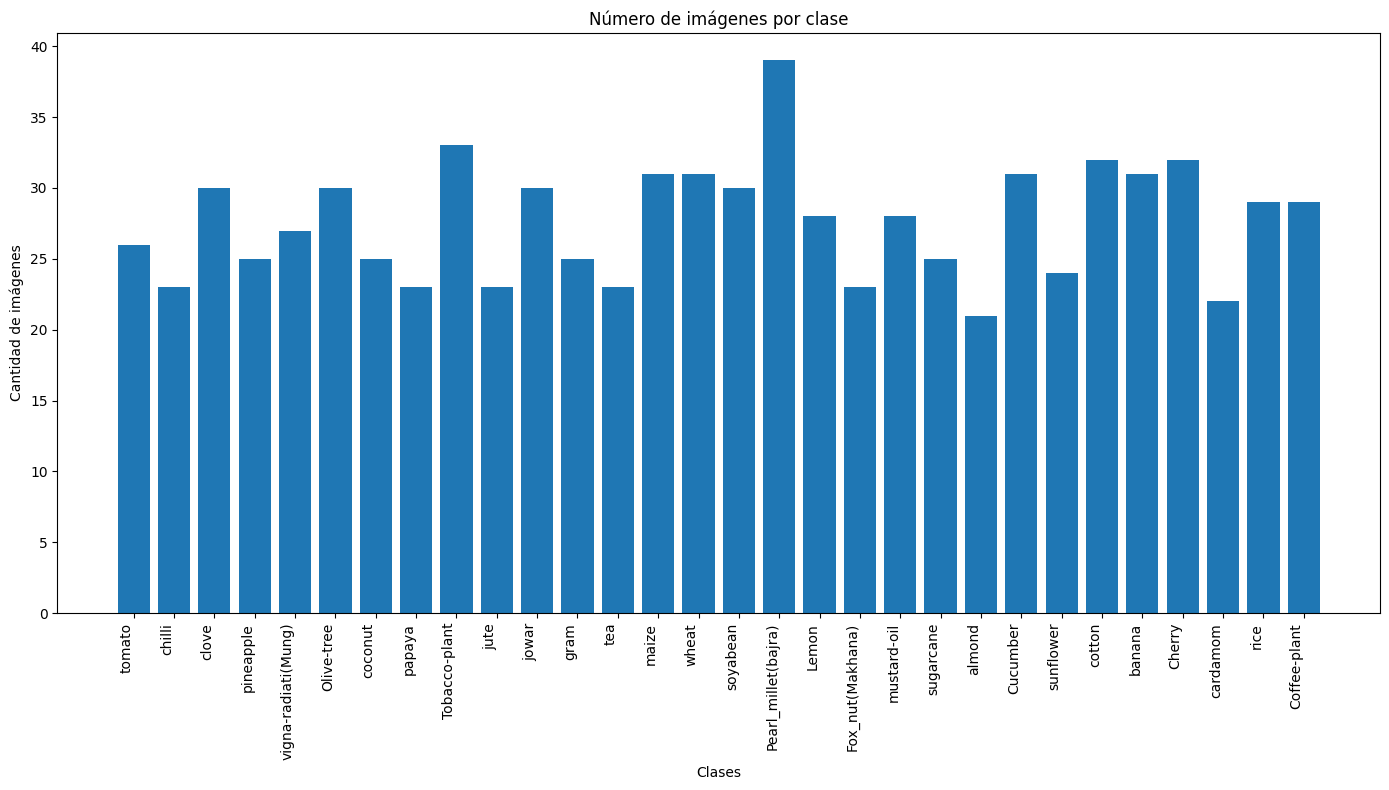

In [3]:
import matplotlib.pyplot as plt
import os

counts = [len(os.listdir(os.path.join(data_dir, c))) for c in classes]

plt.figure(figsize=(14, 8))  # Aumentamos el tamaño de la figura
plt.bar(classes, counts)
plt.xticks(rotation=90, ha='right')  # Rotamos etiquetas del eje X
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Número de imágenes por clase")
plt.tight_layout()
plt.show()



In [4]:
import numpy as np
print(f"Existen un total de {len(classes)} clases")
print(f"La clase mayoritaria es {classes[np.argmax(counts)]} con {max(counts)} imágenes")
print(f"La clase minoritaria es {classes[np.argmin(counts)]} con {min(counts)} imágenes")

Existen un total de 30 clases
La clase mayoritaria es Pearl_millet(bajra) con 39 imágenes
La clase minoritaria es almond con 21 imágenes


El dataset tiene 30 clases que tienen entre 39 y 21 imágenes. Estos datos se consideran pocos para un problema de clasificación por imágenes, por lo que deberemos utilizar técnicas de aumento de datos y de transfer learning.

### Redimensionado de las imagenes

Vamos a comprobar si todas las imagenes tienen el mismo tamaño.

In [5]:
# Vemos si todas las imagenes tienen el mismo tamaño
img_sizes = []
for c in classes:
  class_dir = os.path.join(data_dir, c)
  for img_name in os.listdir(class_dir):
        img_path = os.path.join(data_dir, c, img_name)
        img = cv2.imread(img_path)
        img_sizes.append(img.shape)

unique_sizes = set(img_sizes)
print(f"Los tamaños de las imagenes son: {unique_sizes}")

Los tamaños de las imagenes son: {(161, 314, 3), (1696, 1132, 3), (854, 719, 3), (924, 616, 3), (480, 640, 3), (195, 259, 3), (182, 277, 3), (900, 675, 3), (189, 267, 3), (1102, 735, 3), (262, 192, 3), (163, 310, 3), (1600, 1064, 3), (236, 236, 3), (371, 445, 3), (1600, 1200, 3), (192, 263, 3), (416, 360, 3), (282, 500, 3), (400, 534, 3), (196, 352, 3), (562, 1000, 3), (187, 270, 3), (2298, 4875, 3), (315, 474, 3), (194, 260, 3), (303, 474, 3), (360, 640, 3), (768, 1024, 3), (580, 435, 3), (636, 1024, 3), (1696, 1200, 3), (500, 667, 3), (555, 800, 3), (275, 183, 3), (1200, 675, 3), (314, 474, 3), (3251, 2167, 3), (255, 197, 3), (154, 327, 3), (419, 600, 3), (273, 170, 3), (355, 474, 3), (650, 1000, 3), (165, 220, 3), (298, 425, 3), (202, 250, 3), (540, 650, 3), (2003, 2003, 3), (1600, 1067, 3), (512, 718, 3), (167, 301, 3), (300, 500, 3), (530, 800, 3), (1067, 1600, 3), (207, 243, 3), (169, 298, 3), (1365, 2048, 3), (270, 474, 3), (400, 750, 3), (153, 330, 3), (338, 600, 3), (570, 570,

Como hemos visto, existen diferentes tamaños de imagenes. Esto es un problema para la red, ya que el tamaño de la entrada es constante. Debemos decidir un tamaño estándar para todas las imágenes. Utilizaremos 224 píxeles x 224 píxeles, ya que es el tamaño estándar que utilizan muchos modelos preentrenados.

In [6]:
# Carpeta donde guardar las imágenes redimensionadas
resized_dir = "resized_images"
os.makedirs(resized_dir, exist_ok=True)

for c in classes:
    class_dir = os.path.join(data_dir, c)
    resized_class_dir = os.path.join(resized_dir, c)
    os.makedirs(resized_class_dir, exist_ok=True)  # Crea subcarpeta por clase

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)

        if not img_name.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            continue

        img = cv2.imread(img_path)

        if img is None or len(img.shape) != 3 or img.shape[2] != 3:
            continue

        try:
            img = cv2.resize(img, (224, 224))
            save_path = os.path.join(resized_class_dir, img_name)
            cv2.imwrite(save_path, img)
            print(f"✅ Guardada: {save_path}")
        except Exception as e:
            print(f"❌ Error con {img_name}: {e}")



✅ Guardada: resized_images/tomato/image (16).jpeg
✅ Guardada: resized_images/tomato/image (4).jpeg
✅ Guardada: resized_images/tomato/image (5).jpg
✅ Guardada: resized_images/tomato/image (12).jpeg
✅ Guardada: resized_images/tomato/image (7).jpg
✅ Guardada: resized_images/tomato/image (6).jpg
✅ Guardada: resized_images/tomato/image (9).jpg
✅ Guardada: resized_images/tomato/image (1).jpeg
✅ Guardada: resized_images/tomato/image (2).jpg
✅ Guardada: resized_images/tomato/image (5).jpeg
✅ Guardada: resized_images/tomato/image (4).jpg
✅ Guardada: resized_images/tomato/image (6).jpeg
✅ Guardada: resized_images/tomato/image (13).jpeg
✅ Guardada: resized_images/tomato/image (8).jpeg
✅ Guardada: resized_images/tomato/image (9).jpeg
✅ Guardada: resized_images/tomato/image (15).jpeg
✅ Guardada: resized_images/tomato/image (7).jpeg
✅ Guardada: resized_images/tomato/image (8).jpg
✅ Guardada: resized_images/tomato/image (10).jpeg
✅ Guardada: resized_images/tomato/image (14).jpeg
✅ Guardada: resized_i

## Creación de los conjuntos de datos de entrenamiento, validación y test

### Construimos el dataset

In [7]:
import os
import shutil
import random
from pathlib import Path

# Ruta al directorio con las carpetas de clases
data_dir = "resized_images"
output_dir = "/content/Dataset_out"
os.makedirs(output_dir, exist_ok=True)

# Porcentaje de división
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Para asegurar que la división sea reproducible
random.seed(seed)

# Creamos carpetas destino
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

# Recorremos cada clase
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(n_total * train_split)
    n_val = int(n_total * val_split)
    n_test = n_total - n_train - n_val

    splits = {
        'train': images[:n_train],
        'val': images[n_train:n_train + n_val],
        'test': images[n_train + n_val:]
    }

    for split_name, split_images in splits.items():
        split_class_dir = os.path.join(output_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        for img_name in split_images:
            src = os.path.join(class_path, img_name)
            dst = os.path.join(split_class_dir, img_name)
            shutil.copy2(src, dst)

Mostramos la distribución entre los datos de entrenamiento, validación y test:

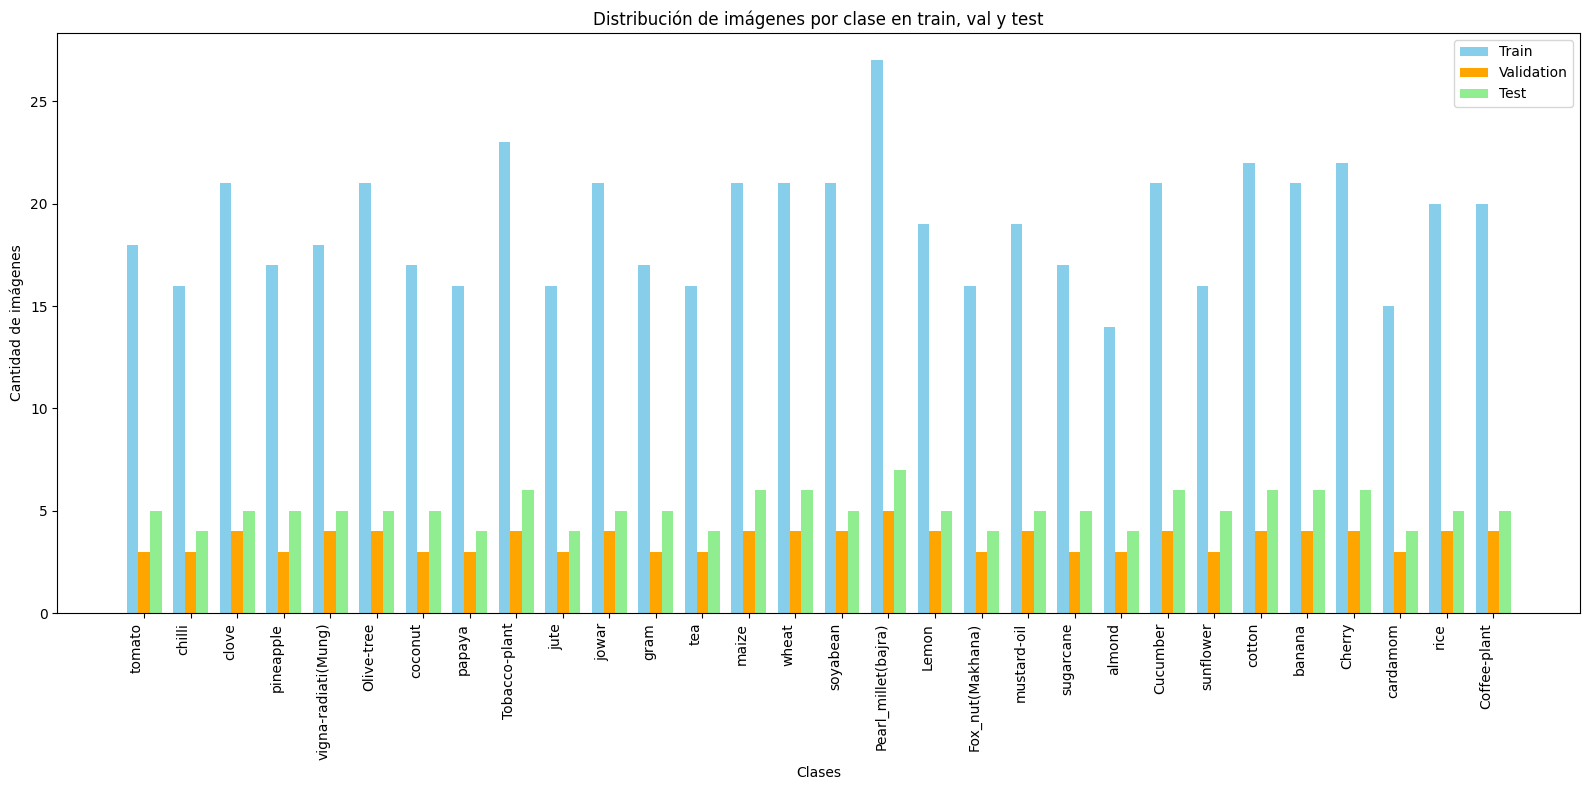

In [8]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Contamos imágenes por clase para cada subconjunto
counts_train = [len(os.listdir(os.path.join(output_dir, 'train', c))) for c in classes]
counts_val   = [len(os.listdir(os.path.join(output_dir, 'val', c))) for c in classes]
counts_test  = [len(os.listdir(os.path.join(output_dir, 'test', c))) for c in classes]

x = np.arange(len(classes))  # posición de cada grupo de barras
width = 0.25  # ancho de cada barra

plt.figure(figsize=(16, 8))
plt.bar(x - width, counts_train, width, label='Train', color='skyblue')
plt.bar(x,         counts_val,   width, label='Validation', color='orange')
plt.bar(x + width, counts_test,  width, label='Test', color='lightgreen')

plt.xticks(x, classes, rotation=90, ha='right')
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de imágenes por clase en train, val y test")
plt.legend()
plt.tight_layout()
plt.show()


Normalizamos las imagenes en Dataset_normalizado para que a la red le cueste menos aprender los datos de entrenamiento.

In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil

# Ruta de los directorios de origen y destino
data_dir = "Dataset_out"
normalized_data_dir = "Dataset_normalizado"

# Crear la estructura de carpetas para Dataset_norm si no existe
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(normalized_data_dir, split)
    os.makedirs(split_dir, exist_ok=True)

    # Crear subcarpetas para cada clase
    for class_name in os.listdir(os.path.join(data_dir, split)):
        class_dir = os.path.join(split_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

# Función para normalizar las imágenes y copiarlas
def normalize_and_copy_images(src_dir, dst_dir):
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(src_dir, split)
        for class_name in os.listdir(split_dir):
            class_dir = os.path.join(split_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in tqdm(os.listdir(class_dir), desc=f"Processing {split}/{class_name}"):
                    img_path = os.path.join(class_dir, img_name)
                    if img_name.endswith('.jpg') or img_name.endswith('.jpeg') or img_name.endswith('.png'):
                        img = cv2.imread(img_path)
                        if img is not None:
                            # Normalizar la imagen
                            img = img / 255.0  # Normalización al rango [0, 1]

                            # Guardar la imagen normalizada en el directorio de destino
                            normalized_class_dir = os.path.join(dst_dir, split, class_name)
                            # Guardar como PNG para que mantenga los valores [0, 1]
                            cv2.imwrite(os.path.join(normalized_class_dir, img_name), np.uint8(img * 255))  # Guardar como imagen normalizada en formato 8-bit

# Normalizar y copiar las imágenes
normalize_and_copy_images(data_dir, normalized_data_dir)

print("Proceso completado. Las imágenes han sido normalizadas y copiadas.")


Processing test/Fox_nut(Makhana): 100%|██████████| 4/4 [00:00<00:00, 579.90it/s]

Proceso completado. Las imágenes han sido normalizadas y copiadas.


Creamos los conjuntos de entrenamiento, validación y test

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Cargamos los conjuntos de datos
output_dir = "/content/Dataset_normalizado"
train_dataset = image_dataset_from_directory(
    os.path.join(output_dir, "train"),
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical",  # Esto asegura que las etiquetas estén codificadas en one-hot
    shuffle = True
)

validation_dataset = image_dataset_from_directory(
    os.path.join(output_dir, "val"),
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical",
    shuffle = True
)

test_dataset = image_dataset_from_directory(
    os.path.join(output_dir, "test"),
    image_size=(224, 224),
    batch_size=32,
    label_mode="categorical",
    shuffle = True
)

Found 569 files belonging to 30 classes.
Found 108 files belonging to 30 classes.
Found 152 files belonging to 30 classes.


## Construcción del modelo

In [11]:
import keras
from keras import layers

Utilizamos una red preentrenada VGG16 con los datos de imagenet. Dejaremos "descongeladas" las últimas 5 capas para poder ajustarlas con nuestros datos de entrenamiento

In [12]:
conv_base = keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
# Congelar todas las capas
for layer in conv_base.layers:
    layer.trainable = False

# Descongelar solo las últimas 2 capas
for layer in conv_base.layers[-5:]:
    layer.trainable = True

Utilizamos data augmentation para aumentar la cantidad de datos de entrada en el entrenamiento de nuestro modelo y así sea capaz de generalizar mejor.

In [13]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    layers.RandomContrast(0.3),
])

Utilizaremos los callbacks:
- ModelCheckpoint: para guardar el mejor resultado.
- EarlyStopping: para parar cuando la pérdida en validación no mejore durante 10 épocas.
- ReduceLROnPlateau: para disminuir el coeficiente de aprendizaje cuando no mejore.

In [17]:
from tensorflow.keras.metrics import Precision, Recall, AUC
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="final_model.keras",
        save_best_only=True,
        monitor="val_loss"),
     keras.callbacks.EarlyStopping(
          monitor='val_loss',
          patience=10,       # Si no mejora en 10 épocas, se para
          restore_best_weights=True),

    keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)
]

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)  # Agregar Batch Normalization
x = layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(30, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy", Precision(name="precision"), Recall(name="recall"), AUC(name="auc")])

model.summary()

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
    )

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ sequential[1][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ sequential[1][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ sequential[1][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_2[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[1][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ global_average_p… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    131,328 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │      3,870 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,884,830 (56.78 MB)

 Trainable params: 7,248,542 (27.65 MB)

 Non-trainable params: 7,636,288 (29.13 MB)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.0330 - auc: 0.5177 - loss: 4.1707 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0556 - val_auc: 0.6367 - val_loss: 4.0138 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.0624 - auc: 0.6114 - loss: 3.8593 - precision: 0.1316 - recall: 0.0024 - val_accuracy: 0.1111 - val_auc: 0.6703 - val_loss: 3.8684 - val_precision: 0.4286 - val_recall: 0.0556 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.0939 - auc: 0.6489 - loss: 3.7263 - precision: 0.6525 - recall: 0.0146 - val_accuracy: 0.1111 - val_auc: 0.7011 - val_loss: 3.6018 - val_precision: 0.3333 - val_recall: 0.0278 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.1070 - auc: 0.6764 - loss: 3.6624 - precision: 0.3363 - recall: 0.0091 - val_accuracy: 0.1759 - val_auc:

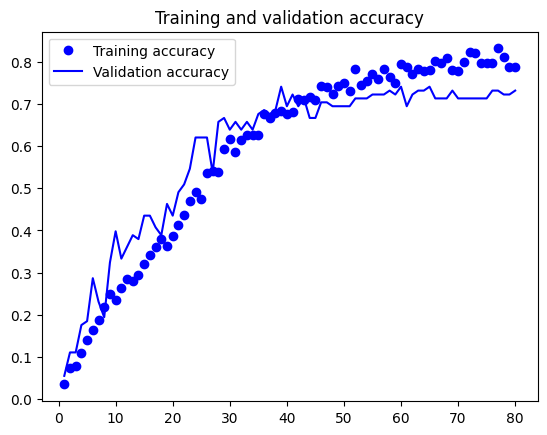

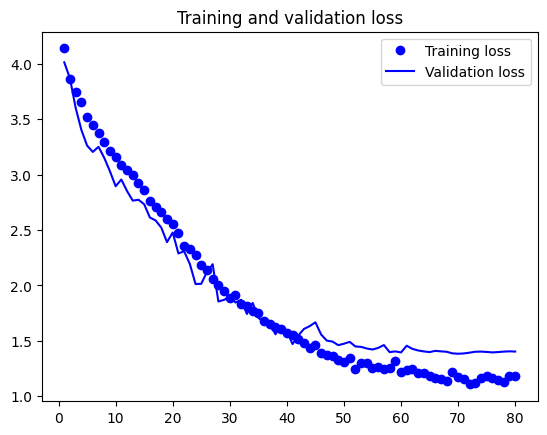

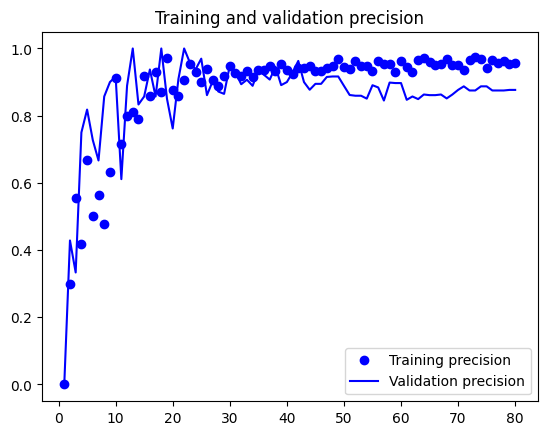

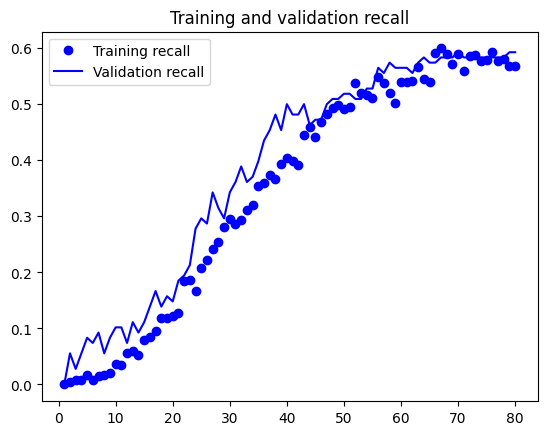

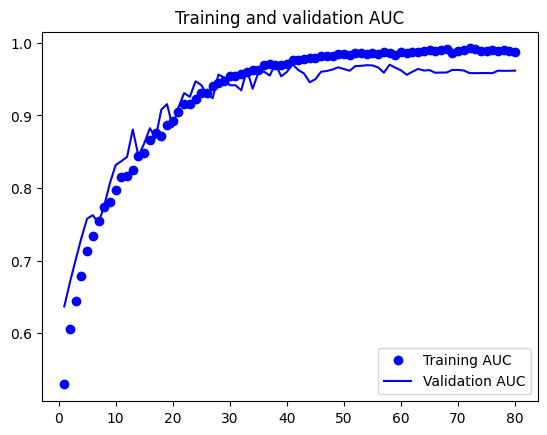

In [18]:
import matplotlib.pyplot as plt

# Obtener las métricas desde el historial
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
precision = history.history["precision"]
val_precision = history.history["val_precision"]
recall = history.history["recall"]
val_recall = history.history["val_recall"]
auc = history.history["auc"]
val_auc = history.history["val_auc"]

epochs = range(1, len(acc) + 1)

# Gráfico de Accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

# Gráfico de Loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.figure()

# Gráfico de Precision
plt.plot(epochs, precision, "bo", label="Training precision")
plt.plot(epochs, val_precision, "b", label="Validation precision")
plt.title("Training and validation precision")
plt.legend()
plt.figure()

# Gráfico de Recall
plt.plot(epochs, recall, "bo", label="Training recall")
plt.plot(epochs, val_recall, "b", label="Validation recall")
plt.title("Training and validation recall")
plt.legend()
plt.figure()

# Gráfico de AUC
plt.plot(epochs, auc, "bo", label="Training AUC")
plt.plot(epochs, val_auc, "b", label="Validation AUC")
plt.title("Training and validation AUC")
plt.legend()
plt.show()


In [ ]:
model = keras.models.load_model("final_model.keras") # /content/feature_extraction_with_data_augmentation.keras
history = model.evaluate(test_dataset)
print(f"Test accuracy: {history[1]}")

Finalmente vemos que el modelo consigue aprender de los datos de entrenamiento y llega a obtener buenos resultados en validación también.

Para mejorar los resultados podríamos seguir experimentando con diferentes arquitecturas, descongelar más capas de la vgg16 o probar con otras redes preentrenadas que capten mejor las características del dataset.